In [2]:
%pip install altair numpy pandas matplotlib seaborn scikit-learn

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install geopandas
%pip install matplotlib

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import altair as alt
import numpy as np
import pandas as pd
from sklearn import set_config
from sklearn.compose import make_column_transformer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)

# **Phase 1: Reading and Cleaning the Data**

In [8]:
import pandas as pd

url = "https://github.com/aseemarora08/SalesData-Python/raw/f372dbfac5626199df6094530dae721b372fef15/Python/Sales_Project_Analysis/sales_data.csv"
sales_product = pd.read_csv(url)

# Now you can display the DataFrame
sales_product

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [9]:
sales_product.dtypes

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

In [10]:
# Convert 'Order Date' to datetime format
sales_product['Order Date'] = pd.to_datetime(sales_product['Order Date'], format='%Y-%m-%d %H:%M:%S')

# Print the updated data types of each column
sales_product['City'] = sales_product['City'].astype(str)
data_types_updated = sales_product.dtypes
print(data_types_updated)

Unnamed: 0                   int64
Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Sales                      float64
City                        object
Hour                         int64
dtype: object


In [11]:
data_types_updated

Unnamed: 0                   int64
Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Sales                      float64
City                        object
Hour                         int64
dtype: object

In [12]:
sales_product

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [13]:

# Extract 'Order Date' and 'Order Time' components
sales_product['Order Time'] = sales_product['Order Date'].dt.time
sales_product['Order Date'] = sales_product['Order Date'].dt.date


# Print the first few rows of the DataFrame to check the result
sales_product.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Order Time
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,00:01:00
1,1,295666,LG Washing Machine,1,600.00,2019-12-29,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,07:03:00
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,18:21:00
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,15:13:00
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,12:38:00


In [14]:
# Drop rows containing NaN values
sales_product = sales_product.dropna()
sales_product

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Order Time
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,00:01:00
1,1,295666,LG Washing Machine,1,600.00,2019-12-29,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,07:03:00
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,18:21:00
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,15:13:00
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,12:38:00
...,...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19,19:02:00
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01,"495 North St, New York City, NY 10001",6,149.99,New York City,19,19:29:00
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18,18:57:00
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18,18:35:00


# **Phase 2: Wrangling**

### Computing Products and their sales

In [15]:
# Creating a copy of the DataFrame to avoid modifying the original
total_sales_product = sales_product.copy()

# Calculating total sales for each product and add a new column 'Total Sales'
total_sales_product = total_sales_product.assign(
    Total_Sales=total_sales_product.groupby('Product')['Quantity Ordered'].transform('sum') * total_sales_product['Price Each']
)

# Print the updated DataFrame
total_sales_product

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Order Time,Total_Sales
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,00:01:00,8037600.00
1,1,295666,LG Washing Machine,1,600.00,2019-12-29,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,07:03:00,399600.00
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,18:21:00,286501.25
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,15:13:00,1132424.50
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,12:38:00,286501.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19,19:02:00,92740.83
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01,"495 North St, New York City, NY 10001",6,149.99,New York City,19,19:29:00,1132424.50
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18,18:57:00,286501.25
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18,18:35:00,286501.25


In [16]:
total_sales_product = total_sales_product[["Product", "Total_Sales"]]
total_sales_product

,Product,Total_Sales
0,Macbook Pro Laptop,8037600.00
1,LG Washing Machine,399600.00
2,USB-C Charging Cable,286501.25
3,27in FHD Monitor,1132424.50
4,USB-C Charging Cable,286501.25
...,...,...
185945,AAA Batteries (4-pack),92740.83
185946,27in FHD Monitor,1132424.50
185947,USB-C Charging Cable,286501.25
185948,USB-C Charging Cable,286501.25


In [17]:
# Removing duplicate rows based on the 'Product' column
total_sales_product_no_duplicates = total_sales_product.drop_duplicates(subset=['Product'])

# Print the DataFrame without duplicate product names
total_sales_product_no_duplicates

,Product,Total_Sales
0,Macbook Pro Laptop,8037600.00
1,LG Washing Machine,399600.00
2,USB-C Charging Cable,286501.25
3,27in FHD Monitor,1132424.50
5,AA Batteries (4-pack),106118.40
8,Bose SoundSport Headphones,1345565.43
9,AAA Batteries (4-pack),92740.83
11,ThinkPad Laptop,4129958.70
15,Lightning Charging Cable,347094.15
16,Google Phone,3319200.00


In [18]:
# Sort the DataFrame by 'Total_Sales' in descending order
total_sales_product_no_duplicates = total_sales_product_no_duplicates.sort_values(by='Total_Sales', ascending=False)
total_sales_product_no_duplicates

,Product,Total_Sales
0,Macbook Pro Laptop,8037600.00
54,iPhone,4794300.00
11,ThinkPad Laptop,4129958.70
16,Google Phone,3319200.00
143,27in 4K Gaming Monitor,2435097.56
61,34in Ultrawide Monitor,2355558.01
25,Apple Airpods Headphones,2349150.00
89,Flatscreen TV,1445700.00
8,Bose SoundSport Headphones,1345565.43
3,27in FHD Monitor,1132424.50


In [19]:
#Plotting Altair BarChart
total_sales_plot = alt.Chart(total_sales_product_no_duplicates).mark_bar().encode(
    y = alt.Y("Total_Sales:Q").title('Total Sales').axis(format='~s'),
    x = alt.X("Product").title("Product").sort("-y")
)
total_sales_plot

alt.Chart(...)

### Studying Macbook Purchasing Paterns and Trends

In [20]:
macbook_data = sales_product[sales_product["Product"] == "Macbook Pro Laptop"]
macbook_data

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Order Time
0,0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30,"136 Church St, New York City, NY 10001",12,1700.0,New York City,0,00:01:00
52,52,295712,Macbook Pro Laptop,1,1700.0,2019-12-10,"331 Madison St, New York City, NY 10001",12,1700.0,New York City,20,20:02:00
57,57,295717,Macbook Pro Laptop,1,1700.0,2019-12-25,"82 10th St, San Francisco, CA 94016",12,1700.0,San Francisco,9,09:51:00
223,223,295871,Macbook Pro Laptop,1,1700.0,2019-12-28,"661 Park St, Dallas, TX 75001",12,1700.0,Dallas,11,11:19:00
302,304,295948,Macbook Pro Laptop,1,1700.0,2019-12-17,"863 West St, San Francisco, CA 94016",12,1700.0,San Francisco,21,21:08:00
...,...,...,...,...,...,...,...,...,...,...,...,...
185757,13429,222728,Macbook Pro Laptop,1,1700.0,2019-06-13,"657 River St, Los Angeles, CA 90001",6,1700.0,Los Angeles,21,21:29:00
185775,13447,222744,Macbook Pro Laptop,1,1700.0,2019-06-11,"775 11th St, Los Angeles, CA 90001",6,1700.0,Los Angeles,7,07:38:00
185796,13468,222765,Macbook Pro Laptop,1,1700.0,2019-06-14,"319 6th St, Portland, OR 97035",6,1700.0,Portland,21,21:33:00
185857,13529,222822,Macbook Pro Laptop,1,1700.0,2019-06-17,"393 Willow St, San Francisco, CA 94016",6,1700.0,San Francisco,0,00:18:00


In [21]:
#Analyzing units as per cities
# Creating a copy of the DataFrame to avoid modifying the original
regional_sales_product = macbook_data.copy()

# Calculating total sales for each product and add a new column 'Total Sales'
regional_sales_product = regional_sales_product.assign(
    Qty_Sales =regional_sales_product.groupby('City')['Quantity Ordered'].transform('sum')
)

# Print the updated DataFrame
regional_sales_product

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Order Time,Qty_Sales
0,0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30,"136 Church St, New York City, NY 10001",12,1700.0,New York City,0,00:01:00,657
52,52,295712,Macbook Pro Laptop,1,1700.0,2019-12-10,"331 Madison St, New York City, NY 10001",12,1700.0,New York City,20,20:02:00,657
57,57,295717,Macbook Pro Laptop,1,1700.0,2019-12-25,"82 10th St, San Francisco, CA 94016",12,1700.0,San Francisco,9,09:51:00,1136
223,223,295871,Macbook Pro Laptop,1,1700.0,2019-12-28,"661 Park St, Dallas, TX 75001",12,1700.0,Dallas,11,11:19:00,382
302,304,295948,Macbook Pro Laptop,1,1700.0,2019-12-17,"863 West St, San Francisco, CA 94016",12,1700.0,San Francisco,21,21:08:00,1136
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185757,13429,222728,Macbook Pro Laptop,1,1700.0,2019-06-13,"657 River St, Los Angeles, CA 90001",6,1700.0,Los Angeles,21,21:29:00,751
185775,13447,222744,Macbook Pro Laptop,1,1700.0,2019-06-11,"775 11th St, Los Angeles, CA 90001",6,1700.0,Los Angeles,7,07:38:00,751
185796,13468,222765,Macbook Pro Laptop,1,1700.0,2019-06-14,"319 6th St, Portland, OR 97035",6,1700.0,Portland,21,21:33:00,337
185857,13529,222822,Macbook Pro Laptop,1,1700.0,2019-06-17,"393 Willow St, San Francisco, CA 94016",6,1700.0,San Francisco,0,00:18:00,1136


In [22]:
# Removing duplicate rows based on the 'Product' column
regional_sales_product_no_duplicates = regional_sales_product.drop_duplicates(subset=['City'])
regional_sales_product_no_duplicates = regional_sales_product_no_duplicates[["City", "Qty_Sales"]]

# Print the DataFrame without duplicate product names
regional_sales_product_no_duplicates.sort_values(by='Qty_Sales', ascending=False)

,City,Qty_Sales
57,San Francisco,1136
498,Los Angeles,751
0,New York City,657
711,Boston,479
223,Dallas,382
1306,Atlanta,379
483,Seattle,356
386,Portland,337
318,Austin,251


In [24]:
#Reading another csv file to find coordinates of the cities
url_2 = "https://github.com/aseemarora08/SalesData-Python/raw/f372dbfac5626199df6094530dae721b372fef15/Python/Sales_Project_Analysis/worldcities.csv"
city_location = pd.read_csv(url_2)

# Display the data types of the DataFrame
print(city_location.dtypes)


city           object
city_ascii     object
lat           float64
lng           float64
country        object
iso2           object
iso3           object
admin_name     object
capital        object
population    float64
id              int64
dtype: object


In [25]:
city_coordinates = city_location.loc[city_location['country'] == 'United States',
                                     ["city","lat", "lng", "population"]]
city_coordinates = city_coordinates.rename(columns={'city': 'City'})
city_coordinates

,City,lat,lng,population
11,New York,40.6943,-73.9249,18972871.0
33,Los Angeles,34.1141,-118.4068,12121244.0
55,Chicago,41.8375,-87.6866,8595181.0
100,Miami,25.7840,-80.2101,5711945.0
104,Dallas,32.7935,-96.7667,5668165.0
...,...,...,...,...
44448,Montague,42.5549,-72.5177,8565.0
44449,Barton,42.0812,-76.4982,8563.0
44450,Guntersville,34.3671,-86.2637,8559.0
44452,Skowhegan,44.7554,-69.6657,8553.0


In [26]:
regional_sales_product_no_duplicates['City'] = regional_sales_product_no_duplicates['City'].str.strip()
city_coordinates['City'] = city_coordinates['City'].str.strip()


In [27]:
non_matching_cities = regional_sales_product_no_duplicates[~regional_sales_product_no_duplicates['City'].isin(city_coordinates['City'])]['City']
print(non_matching_cities)

0    New York City
Name: City, dtype: object


In [28]:
city_coordinates['City'] = city_coordinates['City'].replace('New York', 'New York City')
city_coordinates

,City,lat,lng,population
11,New York City,40.6943,-73.9249,18972871.0
33,Los Angeles,34.1141,-118.4068,12121244.0
55,Chicago,41.8375,-87.6866,8595181.0
100,Miami,25.7840,-80.2101,5711945.0
104,Dallas,32.7935,-96.7667,5668165.0
...,...,...,...,...
44448,Montague,42.5549,-72.5177,8565.0
44449,Barton,42.0812,-76.4982,8563.0
44450,Guntersville,34.3671,-86.2637,8559.0
44452,Skowhegan,44.7554,-69.6657,8553.0


In [29]:
location = pd.merge(regional_sales_product_no_duplicates, city_coordinates, on='City', how='inner')
location

,City,Qty_Sales,lat,lng,population
0,New York City,657,40.6943,-73.9249,18972871.0
1,San Francisco,1136,37.7558,-122.4449,3290197.0
2,Dallas,382,32.7935,-96.7667,5668165.0
3,Dallas,382,44.9221,-123.3130,16663.0
4,Dallas,382,33.9152,-84.8416,13704.0
5,Dallas,382,41.3608,-75.9656,9140.0
6,Austin,251,30.3005,-97.7522,1659251.0
7,Austin,251,43.6721,-92.9784,26030.0
8,Portland,337,45.5371,-122.6500,2036875.0
9,Portland,337,43.6773,-70.2715,220807.0


In [30]:
location = location.drop_duplicates(subset=['City'])
location

,City,Qty_Sales,lat,lng,population
0,New York City,657,40.6943,-73.9249,18972871.0
1,San Francisco,1136,37.7558,-122.4449,3290197.0
2,Dallas,382,32.7935,-96.7667,5668165.0
6,Austin,251,30.3005,-97.7522,1659251.0
8,Portland,337,45.5371,-122.6500,2036875.0
13,Seattle,356,47.6211,-122.3244,3438221.0
14,Los Angeles,751,34.1141,-118.4068,12121244.0
15,Boston,479,42.3188,-71.0852,4208580.0
16,Atlanta,379,33.7628,-84.4220,5046555.0


/var/folders/5l/y__g7p9s33n5qk1s40qpq4_m0000gn/T/ipykernel_68566/3275154688.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


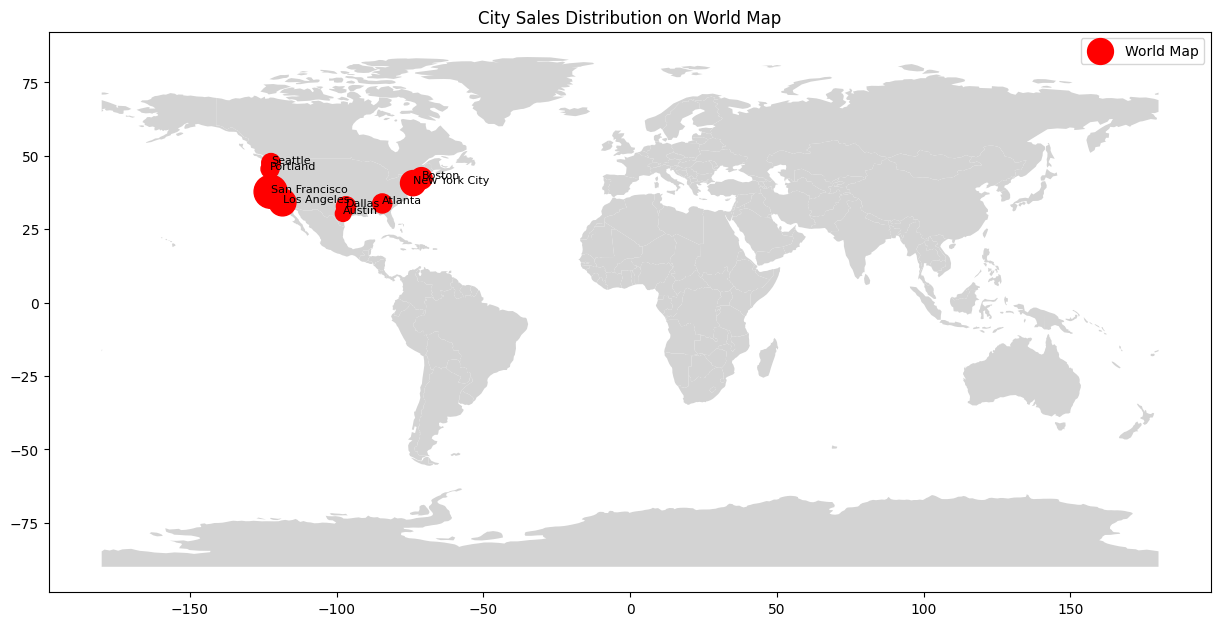

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(location, geometry=gpd.points_from_xy(location['lng'], location['lat']))

# Load the world map from the downloaded shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')

# Plot the cities on top of the world map
gdf.plot(ax=ax, color='red', marker='o', markersize=location['Qty_Sales']*0.5)

# Add labels to the cities
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['City']):
    ax.text(x, y, label, fontsize=8)

# Add a legend
ax.legend(['World Map', 'Cities'])

# Set plot title and show the plot
plt.title('City Sales Distribution on World Map')
plt.show()


### Establishing relation between Date and Macbook Quantity [Incl Date/ Time]

In [32]:
#Analyzing units as per cities
# Creating a copy of the DataFrame to avoid modifying the original
monthly_sales_product = macbook_data.copy()

# Calculating total sales for each product and add a new column 'Total Sales'
monthly_sales_product = monthly_sales_product.assign(
    Qty_Sales = monthly_sales_product.groupby('Month')['Quantity Ordered'].transform('sum')
)

# Print the updated DataFrame
monthly_sales_product

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Order Time,Qty_Sales
0,0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30,"136 Church St, New York City, NY 10001",12,1700.0,New York City,0,00:01:00,643
52,52,295712,Macbook Pro Laptop,1,1700.0,2019-12-10,"331 Madison St, New York City, NY 10001",12,1700.0,New York City,20,20:02:00,643
57,57,295717,Macbook Pro Laptop,1,1700.0,2019-12-25,"82 10th St, San Francisco, CA 94016",12,1700.0,San Francisco,9,09:51:00,643
223,223,295871,Macbook Pro Laptop,1,1700.0,2019-12-28,"661 Park St, Dallas, TX 75001",12,1700.0,Dallas,11,11:19:00,643
302,304,295948,Macbook Pro Laptop,1,1700.0,2019-12-17,"863 West St, San Francisco, CA 94016",12,1700.0,San Francisco,21,21:08:00,643
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185757,13429,222728,Macbook Pro Laptop,1,1700.0,2019-06-13,"657 River St, Los Angeles, CA 90001",6,1700.0,Los Angeles,21,21:29:00,356
185775,13447,222744,Macbook Pro Laptop,1,1700.0,2019-06-11,"775 11th St, Los Angeles, CA 90001",6,1700.0,Los Angeles,7,07:38:00,356
185796,13468,222765,Macbook Pro Laptop,1,1700.0,2019-06-14,"319 6th St, Portland, OR 97035",6,1700.0,Portland,21,21:33:00,356
185857,13529,222822,Macbook Pro Laptop,1,1700.0,2019-06-17,"393 Willow St, San Francisco, CA 94016",6,1700.0,San Francisco,0,00:18:00,356


In [33]:
monthly_sales_product = monthly_sales_product.assign(total_sales = monthly_sales_product["Qty_Sales"]*monthly_sales_product["Price Each"])
monthly_sales_product

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Order Time,Qty_Sales,total_sales
0,0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30,"136 Church St, New York City, NY 10001",12,1700.0,New York City,0,00:01:00,643,1093100.0
52,52,295712,Macbook Pro Laptop,1,1700.0,2019-12-10,"331 Madison St, New York City, NY 10001",12,1700.0,New York City,20,20:02:00,643,1093100.0
57,57,295717,Macbook Pro Laptop,1,1700.0,2019-12-25,"82 10th St, San Francisco, CA 94016",12,1700.0,San Francisco,9,09:51:00,643,1093100.0
223,223,295871,Macbook Pro Laptop,1,1700.0,2019-12-28,"661 Park St, Dallas, TX 75001",12,1700.0,Dallas,11,11:19:00,643,1093100.0
302,304,295948,Macbook Pro Laptop,1,1700.0,2019-12-17,"863 West St, San Francisco, CA 94016",12,1700.0,San Francisco,21,21:08:00,643,1093100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185757,13429,222728,Macbook Pro Laptop,1,1700.0,2019-06-13,"657 River St, Los Angeles, CA 90001",6,1700.0,Los Angeles,21,21:29:00,356,605200.0
185775,13447,222744,Macbook Pro Laptop,1,1700.0,2019-06-11,"775 11th St, Los Angeles, CA 90001",6,1700.0,Los Angeles,7,07:38:00,356,605200.0
185796,13468,222765,Macbook Pro Laptop,1,1700.0,2019-06-14,"319 6th St, Portland, OR 97035",6,1700.0,Portland,21,21:33:00,356,605200.0
185857,13529,222822,Macbook Pro Laptop,1,1700.0,2019-06-17,"393 Willow St, San Francisco, CA 94016",6,1700.0,San Francisco,0,00:18:00,356,605200.0


In [34]:
monthly_sales_product = monthly_sales_product.drop_duplicates(subset=["Month"])
monthly_sales_product

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Order Time,Qty_Sales,total_sales
0,0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30,"136 Church St, New York City, NY 10001",12,1700.0,New York City,0,00:01:00,643,1093100.0
11625,11686,306809,Macbook Pro Laptop,1,1700.0,2020-01-01,"326 14th St, Dallas, TX 75001",1,1700.0,Dallas,2,02:20:00,235,399500.0
24997,9,176565,Macbook Pro Laptop,1,1700.0,2019-04-24,"915 Willow St, San Francisco, CA 94016",4,1700.0,San Francisco,10,10:38:00,454,771800.0
38806,13892,189805,Macbook Pro Laptop,1,1700.0,2019-05-01,"919 Sunset St, San Francisco, CA 94016",5,1700.0,San Francisco,1,01:31:00,465,790500.0
43294,16,150518,Macbook Pro Laptop,1,1700.0,2019-02-26,"847 10th St, San Francisco, CA 94016",2,1700.0,San Francisco,12,12:38:00,276,469200.0
55292,28,162035,Macbook Pro Laptop,1,1700.0,2019-03-08,"44 4th St, Los Angeles, CA 90001",3,1700.0,Los Angeles,13,13:07:00,379,644300.0
70427,9,236679,Macbook Pro Laptop,1,1700.0,2019-08-07,"239 Spruce St, Los Angeles, CA 90001",8,1700.0,Los Angeles,15,15:43:00,299,508300.0
98947,18,278813,Macbook Pro Laptop,1,1700.0,2019-11-09,"131 6th St, Boston, MA 02215",11,1700.0,Boston,22,22:40:00,440,748000.0
116624,115,259469,Macbook Pro Laptop,1,1700.0,2019-10-19,"822 9th St, Atlanta, GA 30301",10,1700.0,Atlanta,19,19:28:00,525,892500.0
146528,54,248204,Macbook Pro Laptop,1,1700.0,2019-09-02,"940 Madison St, Seattle, WA 98101",9,1700.0,Seattle,18,18:42:00,288,489600.0


In [35]:
monthly_sales_product = monthly_sales_product[["Month", "Qty_Sales", "total_sales"]]
monthly_sales_product.sort_values("Month")

,Month,Qty_Sales,total_sales
11625,1,235,399500.0
43294,2,276,469200.0
55292,3,379,644300.0
24997,4,454,771800.0
38806,5,465,790500.0
172395,6,356,605200.0
158157,7,368,625600.0
70427,8,299,508300.0
146528,9,288,489600.0
116624,10,525,892500.0


##### Relation of Month and Qty Sold

In [36]:
#Creating a plot
#Plotting Altair ScatterPlot
mac_monthly_sales_plot = alt.Chart(monthly_sales_product).mark_point().encode(
    y = alt.Y("Qty_Sales").title('Quantity Sales').axis(format='s').scale(zero=False),
    x = alt.X("Month").title("Month").sort("-y").scale(zero=False)
)
mac_monthly_sales_plot

alt.Chart(...)

##### Relation of Month and Total Sales

In [37]:
#Creating a plot
#Plotting Altair ScatterPlot
mac_monthly_sales_plot = alt.Chart(monthly_sales_product).mark_point().encode(
    y = alt.Y("total_sales").title('Total Sales').axis(format='s').scale(zero=False),
    x = alt.X("Month").title("Month").sort("-y").scale(zero=False)
)
mac_monthly_sales_plot

alt.Chart(...)

#### Relation between time and Sales

In [38]:
#Analyzing units as per cities
# Creating a copy of the DataFrame to avoid modifying the original
hourly_sales_product = macbook_data.copy()

# Calculating total sales for each product and add a new column 'Total Sales'
hourly_sales_product = hourly_sales_product.assign(
    Qty_Sales = hourly_sales_product.groupby('Hour')['Quantity Ordered'].transform('sum')
)

# Print the updated DataFrame
hourly_sales_product

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Order Time,Qty_Sales
0,0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30,"136 Church St, New York City, NY 10001",12,1700.0,New York City,0,00:01:00,87
52,52,295712,Macbook Pro Laptop,1,1700.0,2019-12-10,"331 Madison St, New York City, NY 10001",12,1700.0,New York City,20,20:02:00,324
57,57,295717,Macbook Pro Laptop,1,1700.0,2019-12-25,"82 10th St, San Francisco, CA 94016",12,1700.0,San Francisco,9,09:51:00,232
223,223,295871,Macbook Pro Laptop,1,1700.0,2019-12-28,"661 Park St, Dallas, TX 75001",12,1700.0,Dallas,11,11:19:00,320
302,304,295948,Macbook Pro Laptop,1,1700.0,2019-12-17,"863 West St, San Francisco, CA 94016",12,1700.0,San Francisco,21,21:08:00,293
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185757,13429,222728,Macbook Pro Laptop,1,1700.0,2019-06-13,"657 River St, Los Angeles, CA 90001",6,1700.0,Los Angeles,21,21:29:00,293
185775,13447,222744,Macbook Pro Laptop,1,1700.0,2019-06-11,"775 11th St, Los Angeles, CA 90001",6,1700.0,Los Angeles,7,07:38:00,116
185796,13468,222765,Macbook Pro Laptop,1,1700.0,2019-06-14,"319 6th St, Portland, OR 97035",6,1700.0,Portland,21,21:33:00,293
185857,13529,222822,Macbook Pro Laptop,1,1700.0,2019-06-17,"393 Willow St, San Francisco, CA 94016",6,1700.0,San Francisco,0,00:18:00,87


In [39]:
hourly_sales_product = hourly_sales_product.drop_duplicates(subset=["Hour"])
hourly_sales_product

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Order Time,Qty_Sales
0,0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30,"136 Church St, New York City, NY 10001",12,1700.0,New York City,0,00:01:00,87
52,52,295712,Macbook Pro Laptop,1,1700.0,2019-12-10,"331 Madison St, New York City, NY 10001",12,1700.0,New York City,20,20:02:00,324
57,57,295717,Macbook Pro Laptop,1,1700.0,2019-12-25,"82 10th St, San Francisco, CA 94016",12,1700.0,San Francisco,9,09:51:00,232
223,223,295871,Macbook Pro Laptop,1,1700.0,2019-12-28,"661 Park St, Dallas, TX 75001",12,1700.0,Dallas,11,11:19:00,320
302,304,295948,Macbook Pro Laptop,1,1700.0,2019-12-17,"863 West St, San Francisco, CA 94016",12,1700.0,San Francisco,21,21:08:00,293
318,320,295963,Macbook Pro Laptop,1,1700.0,2019-12-08,"556 11th St, Austin, TX 73301",12,1700.0,Austin,10,10:21:00,246
386,388,296030,Macbook Pro Laptop,1,1700.0,2019-12-24,"698 4th St, Portland, OR 97035",12,1700.0,Portland,12,12:31:00,301
424,426,296068,Macbook Pro Laptop,1,1700.0,2019-12-08,"897 Jackson St, San Francisco, CA 94016",12,1700.0,San Francisco,22,22:10:00,215
432,434,296076,Macbook Pro Laptop,1,1700.0,2019-12-03,"679 Chestnut St, San Francisco, CA 94016",12,1700.0,San Francisco,15,15:19:00,271
483,485,296126,Macbook Pro Laptop,1,1700.0,2019-12-31,"15 Main St, Seattle, WA 98101",12,1700.0,Seattle,18,18:45:00,290


In [40]:
hourly_sales_product = hourly_sales_product[["Hour","Qty_Sales"]]
hourly_sales_product

,Hour,Qty_Sales
0,0,87
52,20,324
57,9,232
223,11,320
302,21,293
318,10,246
386,12,301
424,22,215
432,15,271
483,18,290


In [41]:
#Creating a plot
#Plotting Altair ScatterPlot
mac_hourly_sales_plot = alt.Chart(hourly_sales_product).mark_point().encode(
    y = alt.Y("Qty_Sales").title('Quantity Sales').axis(format = 's').scale(zero=False),
    x = alt.X("Hour").title("Hour").sort("-y").scale(zero=False)
)
mac_hourly_sales_plot

alt.Chart(...)

### Drawing Relation between Incomes and Average Spendings

In [43]:
url = "https://github.com/aseemarora08/SalesData-Python/raw/f372dbfac5626199df6094530dae721b372fef15/Python/Sales_Project_Analysis/kaggle_income.csv"
income = pd.read_csv(url, encoding="latin1")

# Display the DataFrame
income

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32521,720296,72,Puerto Rico,PR,Adjuntas Municipio,Guaynabo,Adjuntas,Track,Track,970,787,589417,1691,18.397925,-66.130633,30649,13729,37977,1321.278082
32522,7202966,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,Track,602,787,1801613,795887,18.385424,-67.203310,15520,9923,15541,238.813450
32523,7202976,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,Track,602,787,11031227,0,18.356565,-67.180686,41933,34054,31539,313.551070
32524,7202986,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,Track,602,787,0,33597561,18.412041,-67.213413,0,0,0,0.000000


In [44]:
income.dtypes

id              int64
State_Code      int64
State_Name     object
State_ab       object
County         object
City           object
Place          object
Type           object
Primary        object
Zip_Code        int64
Area_Code      object
ALand           int64
AWater          int64
Lat           float64
Lon           float64
Mean            int64
Median          int64
Stdev           int64
sum_w         float64
dtype: object

In [45]:
income['City'] = income['City'].astype(str)

In [46]:
# Creating a copy of the DataFrame to avoid modifying the original
total_sales_city = sales_product.copy()

# Calculating total sales for each product and add a new column 'Total Sales'
total_sales_city = total_sales_city.assign(
    Total_Sales=total_sales_city.groupby('City')['Quantity Ordered'].transform('sum') * total_sales_city['Price Each']
)

# Print the updated DataFrame
total_sales_city

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Order Time,Total_Sales
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,00:01:00,47484400.00
1,1,295666,LG Washing Machine,1,600.00,2019-12-29,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,07:03:00,16759200.00
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,18:21:00,333787.40
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,15:13:00,7535347.61
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,12:38:00,198393.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19,19:02:00,67358.72
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01,"495 North St, New York City, NY 10001",6,149.99,New York City,19,19:29:00,4189520.68
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18,18:57:00,600356.05
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18,18:35:00,600356.05


In [47]:
total_sales_city = total_sales_city[["City", "Total_Sales"]]
total_sales_city = total_sales_city.drop_duplicates(subset=['City'])
total_sales_city.dtypes
total_sales_city["City"]= total_sales_city["City"].astype(str)

In [48]:
# Creating a copy of the DataFrame to avoid modifying the original
income_sales_city = income.copy()
income_sales_city = income_sales_city[["City", "Mean"]]

income_sales_city = income_sales_city.drop_duplicates(subset=["City"])

income_sales_city

,City,Mean
0,Chickasaw,38773
1,Louisville,37725
2,Columbiana,54606
3,Satsuma,63919
4,Dauphin Island,77948
...,...,...
32438,Vega Baja,17325
32439,Vega Alta,32297
32445,Vieques,27742
32450,Yauco,19969


In [49]:
income_sales_city = income_sales_city.assign(
    Average_Income=income_sales_city.groupby('City')['Mean'].transform('mean')
)
income_sales_city.round(0)

,City,Mean,Average_Income
0,Chickasaw,38773,38773.0
1,Louisville,37725,37725.0
2,Columbiana,54606,54606.0
3,Satsuma,63919,63919.0
4,Dauphin Island,77948,77948.0
...,...,...,...
32438,Vega Baja,17325,17325.0
32439,Vega Alta,32297,32297.0
32445,Vieques,27742,27742.0
32450,Yauco,19969,19969.0


In [50]:
income_sales_city[income_sales_city["City"] == "San Francisco"]

,City,Mean,Average_Income
3505,San Francisco,98645,98645.0


In [51]:
income_sales_city['City'] = income_sales_city['City'].replace('New York', 'New York City')
income_sales_city

,City,Mean,Average_Income
0,Chickasaw,38773,38773.0
1,Louisville,37725,37725.0
2,Columbiana,54606,54606.0
3,Satsuma,63919,63919.0
4,Dauphin Island,77948,77948.0
...,...,...,...
32438,Vega Baja,17325,17325.0
32439,Vega Alta,32297,32297.0
32445,Vieques,27742,27742.0
32450,Yauco,19969,19969.0


In [52]:
#Making Joints on City Names
non_matching_cities_income = total_sales_city[~total_sales_city['City'].isin(income['City'])]['City']
print(non_matching_cities_income)


0      New York City
3      San Francisco
4            Atlanta
6           Portland
7             Dallas
11       Los Angeles
12            Boston
15            Austin
28           Seattle
Name: City, dtype: object


In [53]:
income_sales_city['City'] = income_sales_city['City'].str.strip().str.lower()
total_sales_city['City'] = total_sales_city['City'].str.strip().str.lower()

In [54]:
income_sales = pd.merge(income_sales_city, total_sales_city, on='City', how='right')
income_sales

,City,Mean,Average_Income,Total_Sales
0,new york city,76190,76190.0,47484400.00
1,san francisco,98645,98645.0,7535347.61
2,atlanta,94627,94627.0,198393.90
3,portland,87001,87001.0,167933.35
4,dallas,61638,61638.0,199923.50
5,los angeles,39928,39928.0,33288667.11
6,boston,66866,66866.0,86507.52
7,austin,35116,35116.0,166737.35
8,seattle,38873,38873.0,2482950.00


In [55]:
income_sales[["City", "Average_Income", "Total_Sales"]]

,City,Average_Income,Total_Sales
0,new york city,76190.0,47484400.00
1,san francisco,98645.0,7535347.61
2,atlanta,94627.0,198393.90
3,portland,87001.0,167933.35
4,dallas,61638.0,199923.50
5,los angeles,39928.0,33288667.11
6,boston,66866.0,86507.52
7,austin,35116.0,166737.35
8,seattle,38873.0,2482950.00


In [56]:
income_sales_plot =alt.Chart(income_sales).mark_point().encode(
    x = alt.X("Average_Income").title("Average Income"),
    y = alt.Y("Total_Sales").title("Total Sales"),
    color = alt.Color("City")
)
income_sales_plot

alt.Chart(...)